<a href="https://colab.research.google.com/github/Mmbsaksd/Online-shopping-intention-analysis/blob/main/Online_Shopping_intention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#Checking wether have any missing value
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.fillna(0, inplace=True)

In [12]:
#Classification of x columns for traning the dataset
x = df.iloc[:,5:7].values


In [13]:
x

array([[0.0000000e+00, 2.0000000e-01],
       [6.4000000e+01, 0.0000000e+00],
       [0.0000000e+00, 2.0000000e-01],
       ...,
       [1.8425000e+02, 8.3333333e-02],
       [3.4600000e+02, 0.0000000e+00],
       [2.1250000e+01, 0.0000000e+00]])

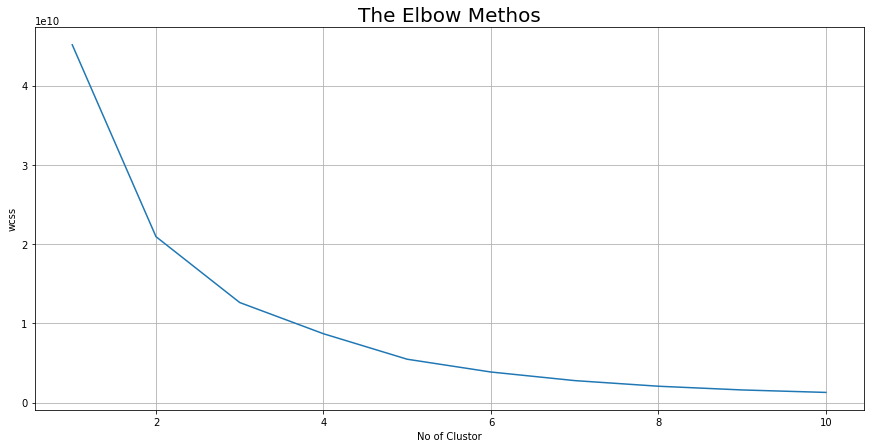

In [14]:
#Finding k value based on elbow theory
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              max_iter=300,
              n_init=10,
              random_state=0,
              algorithm='full',
              tol = 0.001)
  km.fit(x)
  labels = km.labels_
  wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (12,6)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Methos', fontsize=20)
plt.xlabel('No of Clustor')
plt.ylabel('wcss')
plt.show()

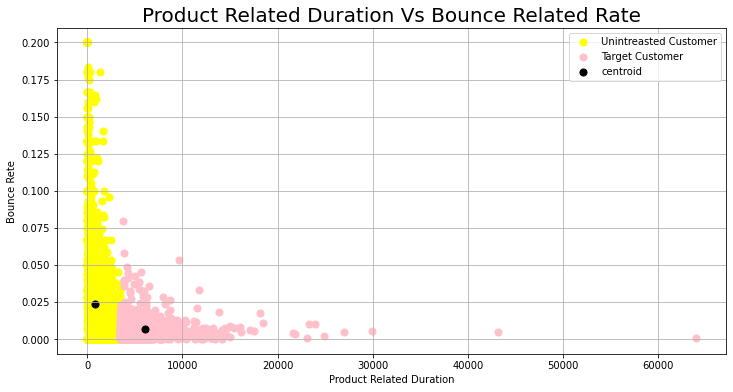

In [18]:
#building KMean Algorithm
km = KMeans(n_clusters=2,
            init = 'k-means++',
            max_iter= 300,
            n_init=10,
            random_state=0
            )
ymean = km.fit_predict(x)

plt.scatter(x[ymean  == 0,0], x[ymean == 0,1], s = 50, c = 'yellow',label= 'Unintreasted Customer')
plt.scatter(x[ymean ==1,0], x[ymean==1,1], s = 50, c = 'pink', label = 'Target Customer')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s =50, c='black', label = 'centroid')




plt.title('Product Related Duration Vs Bounce Related Rate', fontsize=20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rete')
plt.legend()
plt.show()

In [22]:
#Finding and ploting confusion mtrics on graph
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l_true = le.fit_transform(df['Revenue'])

l_pred = ymean

from sklearn import metrics
score = metrics.adjusted_rand_score(l_true, l_pred)
print("Adjusted rand index: ")
print(score)

Adjusted rand index: 
0.08359442469281096


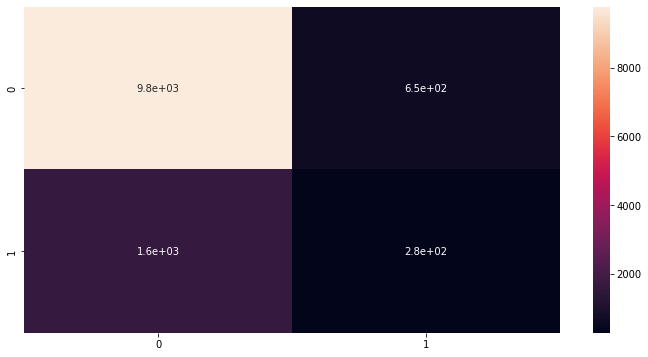

In [33]:
cm = metrics.confusion_matrix(l_true,l_pred)
sns.heatmap(cm, annot=True );